<a href="https://colab.research.google.com/github/passantes12/Bachelor-Thesis-/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [ ]:
dataset_df = pd.read_csv("/content/datasettt.csv", encoding='latin1')

In [ ]:
dataset_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:


# Display descriptive statistics
description = dataset_df.describe()

print(description)

            Quantity          Price    Customer ID
count  541910.000000  541910.000000  406830.000000
mean        9.552234       4.611138   15287.684160
std       218.080957      96.759765    1713.603074
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [ ]:
import pandas as pd


dataset_df = dataset_df.rename(columns=column_info)

# Drop duplicate rows
dataset_df = dataset_df.drop_duplicates()

# Drop rows with missing values
dataset_df = dataset_df.dropna()

# Remove rows where Invoice number starts with 'C' (indicating cancellation)
dataset_df = dataset_df[~dataset_df["Invoice"].str.startswith("C")]

# Select target columns
target_columns = ["Customer ID","InvoiceDate","Price","Quantity"]
target_data = dataset_df[target_columns]

# Display the first few rows of the preprocessed dataset
target_data.head()

,Customer ID,InvoiceDate,Price,Quantity
0,17850.0,01/12/2010 08:26,2.55,6
1,17850.0,01/12/2010 08:26,3.39,6
2,17850.0,01/12/2010 08:26,2.75,8
3,17850.0,01/12/2010 08:26,3.39,6
4,17850.0,01/12/2010 08:26,3.39,6


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


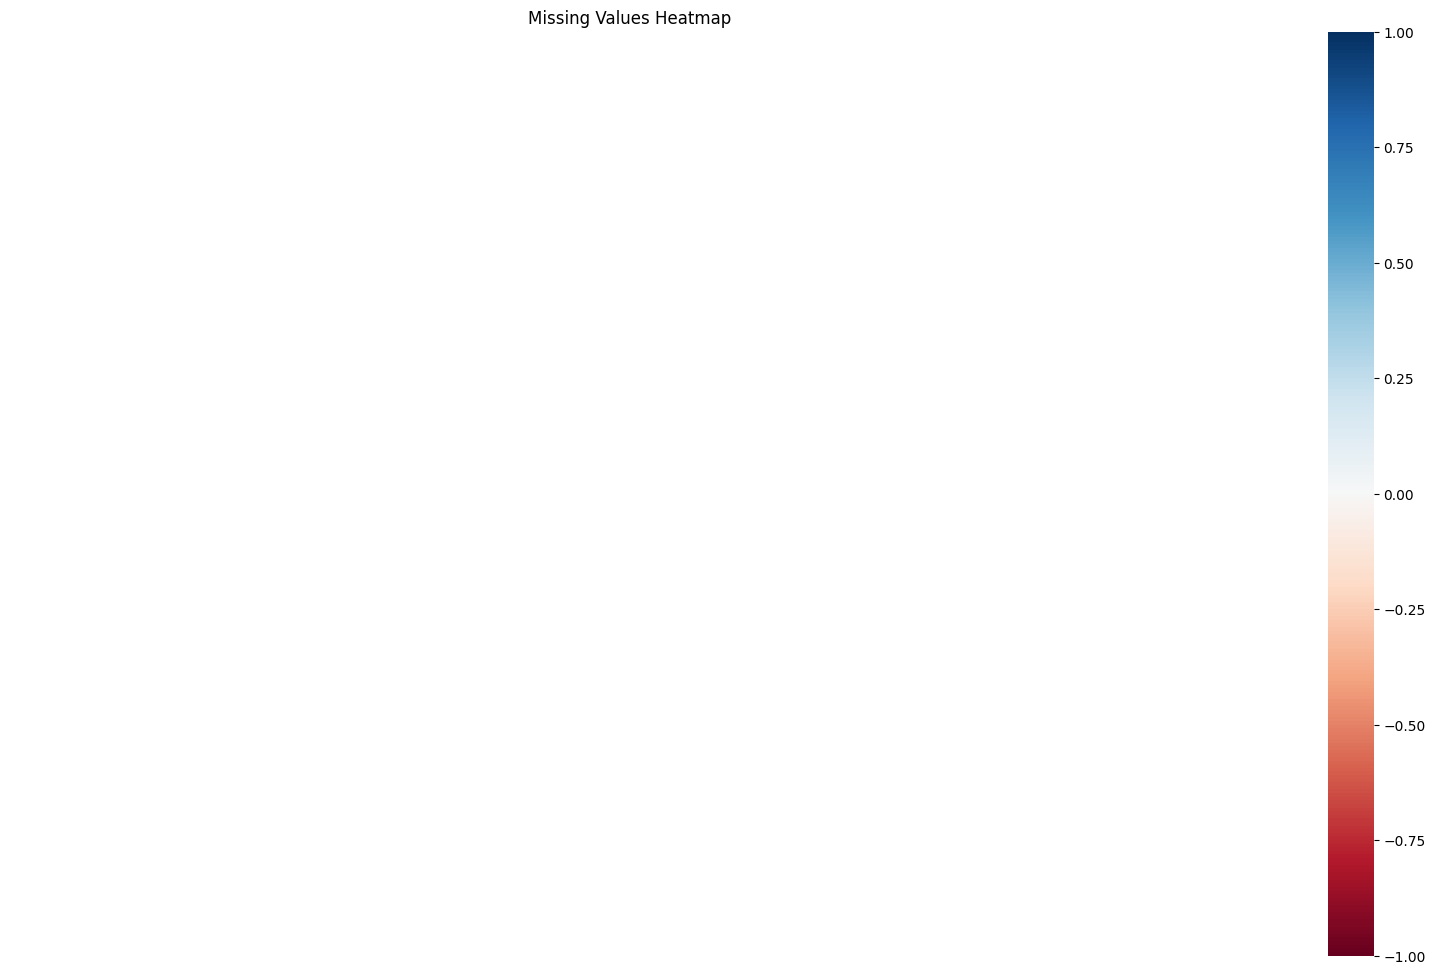

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values using missingno library
msno.heatmap(target_data)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
import pandas as pd

# I assume you have your customer transaction data in 'dataset_df' DataFrame.
# The DataFrame should have at least 'Customer ID', 'InvoiceDate', and 'Price' columns.

# Convert 'InvoiceDate' to datetime if not already converted
dataset_df['InvoiceDate'] = pd.to_datetime(dataset_df['InvoiceDate'], format='%d/%m/%Y %H:%M')

# Calculate Recency, Frequency, and Monetary values
now = pd.to_datetime('now')
recency = dataset_df.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (now - recency['InvoiceDate']).dt.days

frequency = dataset_df.groupby('Customer ID').size().reset_index(name='Frequency')

monetary_value = dataset_df.groupby('Customer ID')['Price'].sum().reset_index()
monetary_value.columns = ['Customer ID', 'MonetaryValue']

# Merge Recency, Frequency, and Monetary values
rfm = recency.merge(frequency, on='Customer ID').merge(monetary_value, on='Customer ID')

# Define RFM score segments
rfm['R_Score'] = pd.qcut(rfm['Recency'], 2, ['High', 'Low'])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 2, ['Low', 'High'], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'], 2, ['Low', 'High'], duplicates='drop')

# Define the strategies based on RFM segments
def assign_strategy(rfm_row):
    if rfm_row['R_Score'] == 'High' and rfm_row['F_Score'] == 'High' and rfm_row['M_Score'] == 'High':
        return 'Maintain and Develop Loyalty'
    elif rfm_row['R_Score'] == 'High':
        return 'Increase Activity for General Customers'
    elif rfm_row['F_Score'] == 'High':
        return 'Improve Retention Rate'
    else:
        return 'Re-engage Lost Customers'

# Assign strategies
rfm['Strategy'] = rfm.apply(assign_strategy, axis=1)

# Display the first few rows of the DataFrame
print(rfm.head())

   Customer ID         InvoiceDate  Recency  Frequency  MonetaryValue R_Score  \
0      12346.0 2011-01-18 10:01:00     4850          1           1.04     Low   
1      12347.0 2011-12-07 15:52:00     4526        182         481.21    High   
2      12348.0 2011-09-25 13:13:00     4600         31         178.71     Low   
3      12349.0 2011-11-21 09:51:00     4543         73         605.10    High   
4      12350.0 2011-02-02 16:01:00     4834         17          65.30     Low   

  F_Score M_Score                      Strategy  
0     Low     Low      Re-engage Lost Customers  
1    High    High  Maintain and Develop Loyalty  
2     Low    High      Re-engage Lost Customers  
3    High    High  Maintain and Develop Loyalty  
4     Low     Low      Re-engage Lost Customers  


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df and already loaded with the data above
# One-hot encode the 'Strategy' column
encoded_df = pd.get_dummies(dataset_df, columns=['Strategy'])

# Show the new DataFrame structure
print(encoded_df.head())

KeyError: "None of [Index(['Strategy'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Assuming you have your feature matrix X and target variable y
X = rfm[['Recency', 'Frequency', 'MonetaryValue']]
y = rfm['Strategy']  # Assuming 'TargetVariable' is your target variable

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("AUC:", auc)
print("Accuracy:", accuracy)

ValueError: could not convert string to float: 'Re-engage Lost Customers'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have your feature matrix X and target variable y
X = rfm[['Recency', 'Frequency', 'MonetaryValue']]
y = rfm['Churn']  # 'Churn' column is used as the target variable

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation of Accuracy: 0.0
